In [53]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

(sec:theory_urn)=
# The Urn Model

The urn model is a simple abstraction of the chance mechanism for drawing indistinguishable marbles from a container, an urn. The randomness in the selection process of drawing marbles from an urn can be extended to many chance processes in real-life examples, and we can simulate the random behavior of the urn model and use our findings to better understand compute the accuracy of our data. To explain both sampling methods, we use a small population of seven elements. The population is small enough that we can list all possible samples that might result from  these sampling methods.

__EXAMPLE: SpaceX Starship Protoypes.__
The SpaceX Starship prototypes are called $SN1$, $SN2$, ..., where $SN$ stands for "serial number". In the first half of 2020, seven of these prototypes were built, and before deploying them a sample of them were pressure tested. Suppose a sample of three of the population of seven Starship prototypes for testing. (Note that while this example is artificial, much of the context is based on the actual SpaceX program and the  pressure tests made on the Starship prototypes, $SN1$, $SN2$, ..., $SN7$.)  $\blacksquare$ 

To study which three prototypes are to be selected for pressure testing, we use the urn model. We write a label on each marble, place all the marbles in the urn, mix them well, and draw three without looking and without replacement between draws. All of the the possible samples we could get are listed below. 

$$ABC ~~ ABD ~~ ABE ~~ ABF ~~ ABG ~~ ACD ~~ ACE \\ ACF ~~ ACG ~~ ADE ~~ ADF ~~ ADG ~~ AEF ~~ AEG \\ AFG ~~ BCD ~~ BCE ~~ BCF ~~ BCG ~~ BDE ~~ BDF \\ BDG ~~ BEF ~~ BEG ~~BFG ~~CDE ~~ CDF ~~ CDG \\ CEF ~~ CEG ~~ CFG ~~ DEF ~~ DEG ~~ DFG ~~ EFG  $$

We use the labels $A$, $B$, etc. rather than $SN1$, $SN2$, etc. because they are shorter and easier to distinguish from one another. There are $35$  unique samples of three from our population of seven. 
By design, each of these $35$ samples is equally likely to be chosen (the marbles are indistinguishable and well mixed) so the chance of any particular sample is the same as any other sample. 

## Sampling Distribution of a Statistic

With the urn model and simulation, we can study the sampling distribution of a statistic calculated based on the marbles drawn. Suppose we are interested in whether or not the prototypes that correspond to the marbles drawn from the urn pass a pressure test. If for example, four of the seven prototypes will fail the test, then we might summarize our draws with, say, the proportion of prototypes drawn from the urn that fail the test.  Each of our 35 possible samples gives us a summary statistic, a sample proportion. For concreteness, suppose prototypes $A,B,D, and F$ would fail the pressure test, if chosen. Each set of three marbles, yields a sample proportion. This sample proportion might be $0$, $1/3$, $2/3$ or $1$. For each triple, we can calculate its corresponding proprotion. Below are a few examples.

|    |    |    |    |    |   
| :---        | :----   |  :--- | :--- |  :--- |   
| Sample      | ABC       | BCE   | BDF | CEG | 
| Proportion  | 2/3       | 1/3   | 1   | 0   | 

These samples proportions can be summarized into a table.  There are 4 samples that give us all failed tests (sample proportion of 1). These are: $ABD$ , $ABF$, $ADF$, $BDF$, so the chance of observing a sample proportion of $1$ is $4/35$.  The table below summaries these possible values and their relative occurrence.

| Sample Proportion | No. Occurrences | Fraction |
| :---: | :---: | :---: |
| 1 | 4 | 4/35 |
| 2/3 | 18 | 18/35 |
|1/3 | 12 | 12/35 |
| 0 | 1 | 1/35 |

While these calculations are relatively straight forward, we can approximate them through a simulation study. To do this, we take samples of three from our population over and over, say 100,000 times.  For each sample, we calculate the proportion of failures. That gives us 100,000 simulated sample proportions. 
The table of the simulated proportions should look like the distribution above. We confirm this with a simulation study. 

## Simulating the Sampling Distribution

Our original urn had seven marbles, one for each protoype. However, since we care only about whether the prototype fails or passes the test, we can re-label each marble as 'fail' or 'pass'.  We create this revised urn as an array. 

In [54]:
urn = ['fail', 'fail', 'fail', 'fail', 'pass', 'pass', 'pass']

We simulate the draw of three marbles from our urn without replacement between draws using numpy's 'random.choice' as follows. 

In [55]:
np.random.choice(urn, size=3, replace=False)

array(['pass', 'fail', 'pass'], dtype='<U4')

We can keep sampling from our urn to see what the results might look like.

In [56]:
[np.random.choice(urn, size = 3, replace = False) for i in range(10)] 

[array(['fail', 'pass', 'fail'], dtype='<U4'),
 array(['fail', 'pass', 'pass'], dtype='<U4'),
 array(['pass', 'fail', 'fail'], dtype='<U4'),
 array(['pass', 'fail', 'pass'], dtype='<U4'),
 array(['fail', 'fail', 'fail'], dtype='<U4'),
 array(['fail', 'pass', 'pass'], dtype='<U4'),
 array(['pass', 'fail', 'pass'], dtype='<U4'),
 array(['fail', 'pass', 'fail'], dtype='<U4'),
 array(['pass', 'pass', 'fail'], dtype='<U4'),
 array(['fail', 'pass', 'pass'], dtype='<U4')]

Since we simply want to count the number of failures in the sample, it's easier if the marbles are labeled 1 for fail and 0 for pass. This way we can sum the results of the three draws to get the number of failures in the sample. Again, we re-label the marbles in the urn, and compute the fraction of fails.

In [57]:
urn = [1, 1, 1, 1, 0, 0, 0]
sum(np.random.choice(urn, size=3, replace=False))/3

0.3333333333333333

For our simulation, we generate 100,000 samples, and compute the proportion of fails in each.

In [58]:
simulations = [sum(np.random.choice(urn, size=3, replace=False)) / 3
               for i in range(100000)] 

Let's study these 100,000 sample proportions and match them against what we calculated already using the  table based on the enumeration of the 35 possible samples.

We expect the simulation results to be close to our earlier calculations because we have repeated the sampling process many many times. We compare the fraction of the 100,000 values that are $0$, $1/3$, $2/3$, and $1$ and make a plot. These fractions should be, approximately, $1/35$, $12/35$, $18/35$, and $4/35$, or about  $0.03$, $0.34$, $0.51$, and $0.11$. They match well.

In [59]:
unique_els, counts_els = np.unique(np.array(simulations), return_counts=True)

In [60]:
np.array((unique_els, counts_els/100000))

array([[0.  , 0.33, 0.67, 1.  ],
       [0.03, 0.34, 0.51, 0.11]])

Text(0.5, 0, 'Sample Proportion')

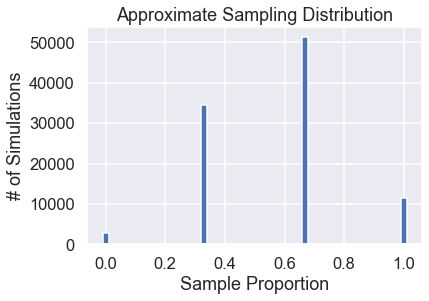

In [61]:
plt.hist(simulations, bins = [-0.01, 0.01, 0.32, 0.34, 0.66, 0.68, 0.99, 1.01 ])
#plt.axvline(0.571, color='red', linestyle='dashed', linewidth=2)
plt.title('Approximate Sampling Distribution')
plt.ylabel('# of Simulations')
plt.xlabel('Sample Proportion')

The simulations closely match the table we created based on enumerating all of the possible outcomes.
This simulation study does not *prove* that we expect 18/35 samples to have two fails, but we can see that it does give us excellent approximations to our earlier calculations, which is reassuring.
More importantly, when we have a more complex setting where it might be difficult to enumerate the frequencies for all possibilities, a simulation study can offer valuable insights. 

:::{note}

Simulation studies repeat a random process many many times.  A summary of the patterns that result from the simulation can approximate the theoretical properties of the chance process. This summary is not the same as proving these theoretical properties, but often the guidance we get from the simulation is adequate for our purposes.

:::

Drawing marbles from an urn with 0s and 1s is such a popular framework for understanding randomness that this chance process has been given a formal name, the hypergeometric. And, most software provide the functionality to rapidly carry out simulations of the hypergeomteric. We redo our simulation using the hypergeometric to complete this section.     

## The Hypergeometric

The version of the urn model where we count the number of marbles of a certain type (in our case 'fail' marbles) is so common that there is a random chance process named for it: the hypergeometric. 
Instead of using `random.choice`, we can use numpy's `random.hypergeometric` to simulate drawing marbles from the urn and counting the number of `fails`. The `random.hypergeometric` method is optimzed for the 0-1 urn and allows us to ask for 100,000 simulations in one call. For completeness, we repeat our simulation study and calculate the empirical proportions.  

In [62]:
simulations_fast = np.random.hypergeometric(ngood=4, nbad=3, nsample=3, size=100000)

Note: we don't think that a pass is bad; it's just a naming convention to call the type you want to count 'good' and the other 'bad'. 

In [63]:
unique_els, counts_els = np.unique(np.array( simulations_fast ), return_counts=True)

In [64]:
np.array((unique_els, counts_els/100000))

array([[0.  , 1.  , 2.  , 3.  ],
       [0.03, 0.34, 0.52, 0.11]])

Perhaps the two most common chance processes are those that arise from counting the number of 1s drawn from a 0-1 urn: drawing without replacement is the *hypergeometric* and drawing with replacement is the *binomial*.

:::{note}

Whenever possible, it's a good idea to use the functionality provided in a third party package for simulating from a named distribution, rather than writing your own function, such as the random number generators offered in numpy. It's best to take advanatge of efficient and accurate code that others have  devloped.

:::

Our approach in this book is to develop intuition based on simulation studies to understand the results of a chance process. However, we do formalize the notion of a probability distribution of a statistics (like the proportion of fails in a sample) in Section {numref}`sec:theory_probIntro`. 

Now that we have simulation as a tool for understanding accuracy, we can revisit the election example from numref Chapter ch:data_scope and carry out a post-election study of what might have gone wrong with the voter polls. This simulation study imitates drawing more than a thousand marbles (voters who participate in the poll) from an urn of six million. We can examine potential sources of bias and the variation in the polling results, and carry out a what-if analysis, where we examine how the predictions might have gone if even a larger number of draws from the urn were taken.    